# 机器学习大作业-威斯康星州乳腺癌分类--运用贝叶斯分类器
------
* from 物联网工程22-1班 柯梦然 2022217573

 模拟一个端到端的项目案例，假如我是一个医院最近新雇佣的数据科学家，以下是我经历的主要步骤：
  1. 观察大局
  2. 获得数据
  3. 从数据探索和可视化中获得洞见
  4. 机器学习算法的数据准备
  5. 选择和训练模型
  6. 微调模型
  7. 展示解决方案
  8. 启动、监控和维护系统

#### 设置

In [1]:
from sklearn import datasets
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest,f_classif
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
import numpy as np
import warnings
warnings.filterwarnings("ignore")

#### 下载乳腺癌数据(这里是用sklearn的内置数据集)

In [2]:
cancer_data = datasets.load_breast_cancer()
X = cancer_data.data
Y = cancer_data.target

#### 查看数据集信息

In [3]:
print("数据信息：")
print("数据集特征名称：", cancer_data.feature_names)
print("\n")
print("目标变量名称：", cancer_data.target_names)
print("\n")
print("数据集特征形状：", X.shape)
print("\n")
print("目标变量形状：", Y.shape)

数据信息：
数据集特征名称： ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


目标变量名称： ['malignant' 'benign']


数据集特征形状： (569, 30)


目标变量形状： (569,)


---

In [4]:
print("数据统计信息:")
print("最小值：",X.min(axis=0))
print("\n")
print("最大值：",X.max(axis=0))
print("\n")
print("平均值：",X.mean(axis=0))
print("\n")
print("标准差：",X.std(axis=0))
print("\n")
print("显示前五行数据")
cancerdf = pd.DataFrame(cancer_data.data,columns=cancer_data.feature_names)
print(cancerdf.head())

数据统计信息:
最小值： [6.981e+00 9.710e+00 4.379e+01 1.435e+02 5.263e-02 1.938e-02 0.000e+00
 0.000e+00 1.060e-01 4.996e-02 1.115e-01 3.602e-01 7.570e-01 6.802e+00
 1.713e-03 2.252e-03 0.000e+00 0.000e+00 7.882e-03 8.948e-04 7.930e+00
 1.202e+01 5.041e+01 1.852e+02 7.117e-02 2.729e-02 0.000e+00 0.000e+00
 1.565e-01 5.504e-02]


最大值： [2.811e+01 3.928e+01 1.885e+02 2.501e+03 1.634e-01 3.454e-01 4.268e-01
 2.012e-01 3.040e-01 9.744e-02 2.873e+00 4.885e+00 2.198e+01 5.422e+02
 3.113e-02 1.354e-01 3.960e-01 5.279e-02 7.895e-02 2.984e-02 3.604e+01
 4.954e+01 2.512e+02 4.254e+03 2.226e-01 1.058e+00 1.252e+00 2.910e-01
 6.638e-01 2.075e-01]


平均值： [1.41272917e+01 1.92896485e+01 9.19690334e+01 6.54889104e+02
 9.63602812e-02 1.04340984e-01 8.87993158e-02 4.89191459e-02
 1.81161863e-01 6.27976098e-02 4.05172056e-01 1.21685343e+00
 2.86605923e+00 4.03370791e+01 7.04097891e-03 2.54781388e-02
 3.18937163e-02 1.17961371e-02 2.05422988e-02 3.79490387e-03
 1.62691898e+01 2.56772232e+01 1.07261213e+02 8.80583128

#### 查看缺失值和异常值

In [5]:
df = pd.DataFrame(X,columns=cancer_data.feature_names)
print("缺失值数量:")
print(df.isnull().sum())

缺失值数量:
mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
dtype: int64


----

In [6]:
print("统计信息：")
print(df.describe())

统计信息：
       mean radius  mean texture  mean perimeter    mean area  \
count   569.000000    569.000000      569.000000   569.000000   
mean     14.127292     19.289649       91.969033   654.889104   
std       3.524049      4.301036       24.298981   351.914129   
min       6.981000      9.710000       43.790000   143.500000   
25%      11.700000     16.170000       75.170000   420.300000   
50%      13.370000     18.840000       86.240000   551.100000   
75%      15.780000     21.800000      104.100000   782.700000   
max      28.110000     39.280000      188.500000  2501.000000   

       mean smoothness  mean compactness  mean concavity  mean concave points  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.019380        0.000000             0.000000   
25%

----

异常值可视化：


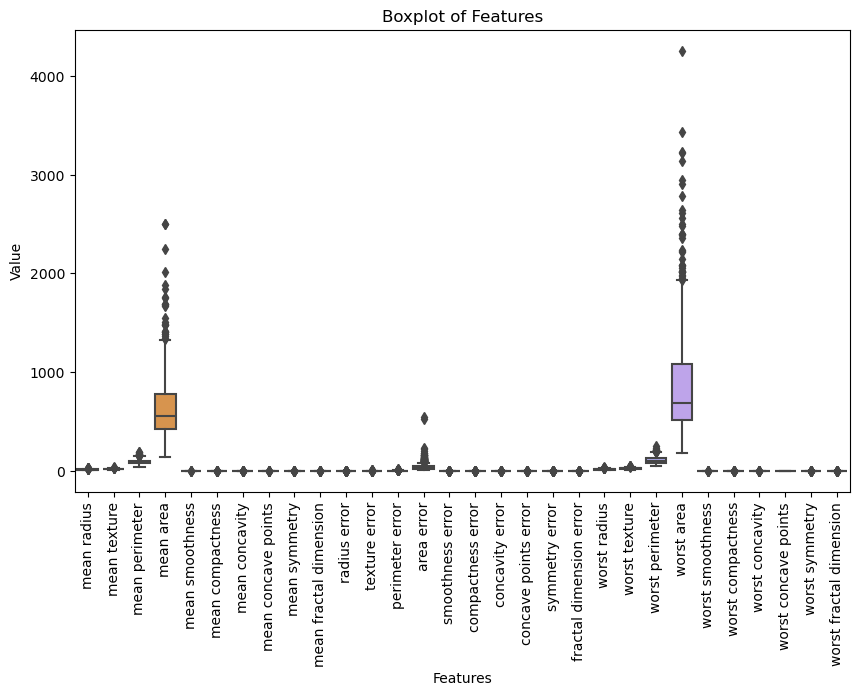

In [7]:
print("异常值可视化：")
plt.figure(figsize=(10,6))
sns.boxplot(data=df,orient="v")
plt.xticks(range(len(cancer_data.feature_names)),cancer_data.feature_names,rotation=90)
plt.xlabel("Features")
plt.ylabel("Value")
plt.title("Boxplot of Features")
plt.show()

##### 查看数据集特征间的相关性

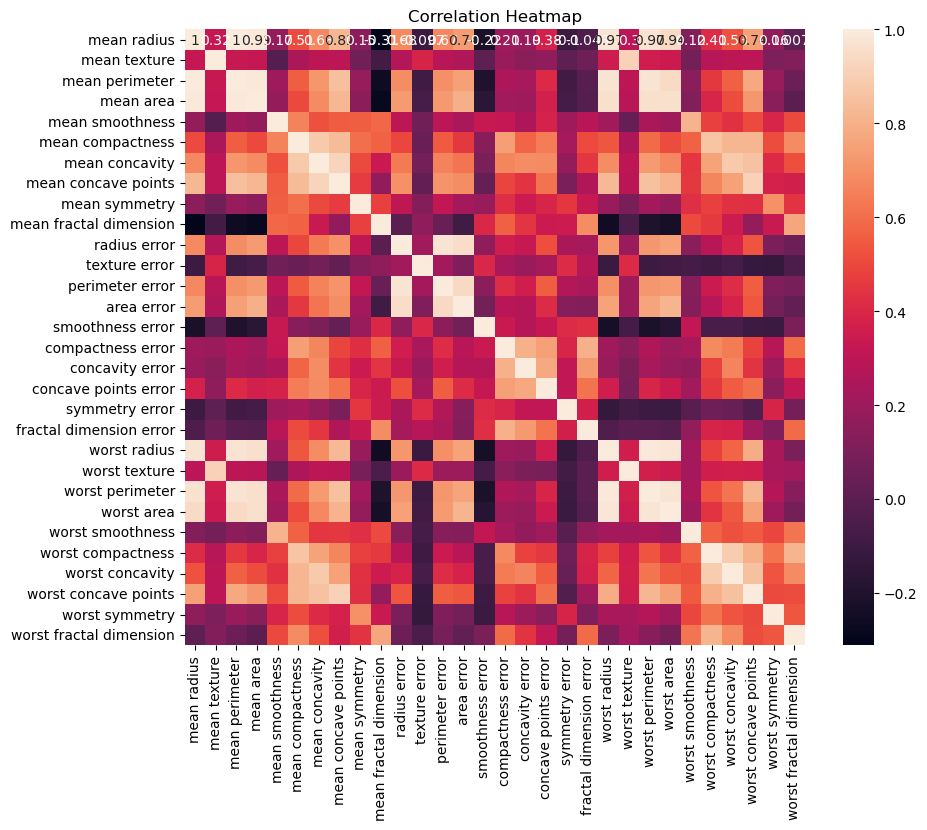

In [8]:
correlation_matrix = df.corr()
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix,annot=True,cmap=None)
plt.title("Correlation Heatmap")
plt.savefig("a1.png")
plt.show()

#### 数据信息可视化

##### 绘制直方图

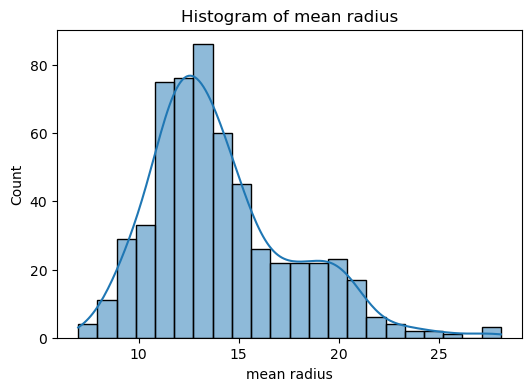

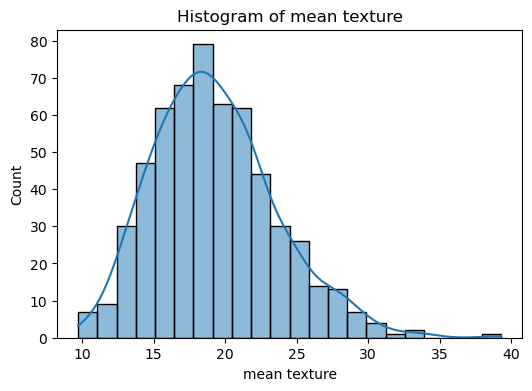

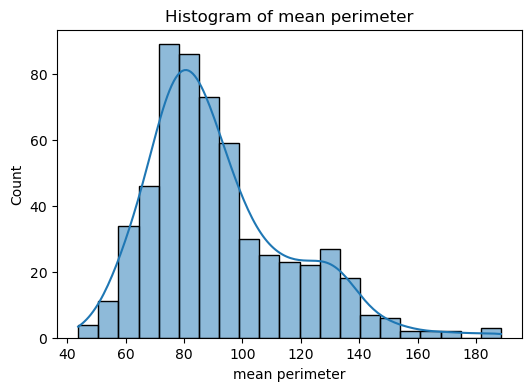

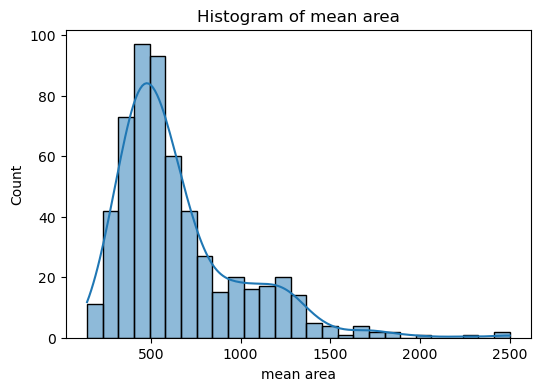

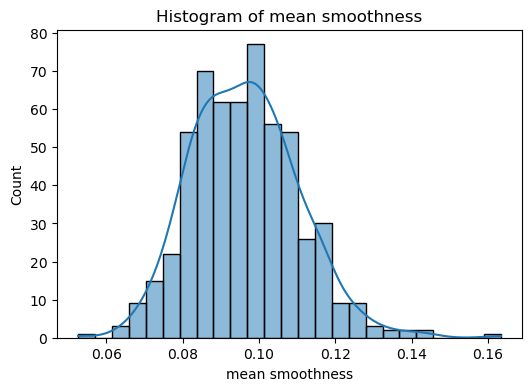

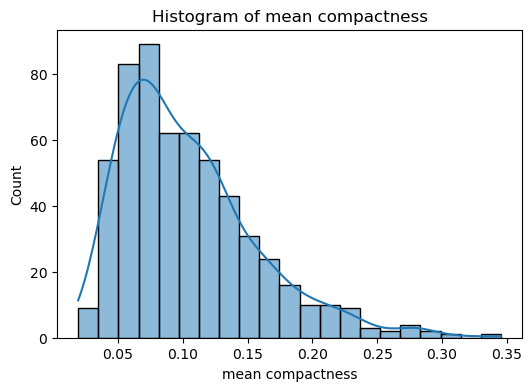

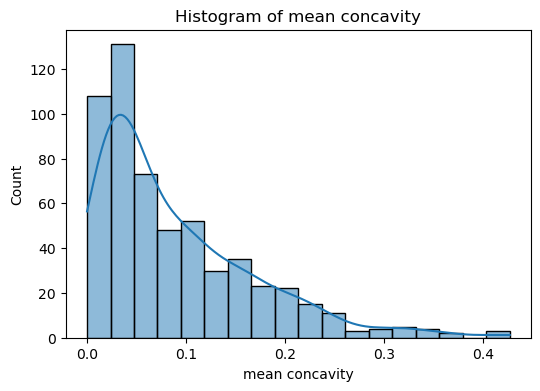

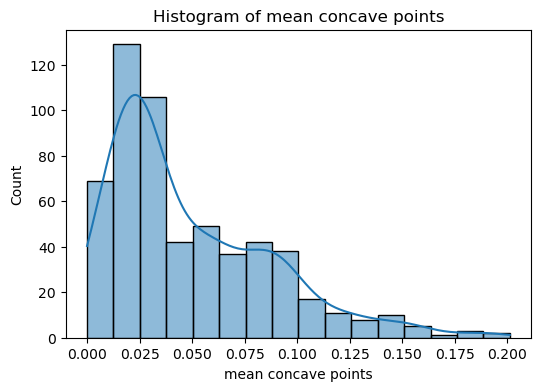

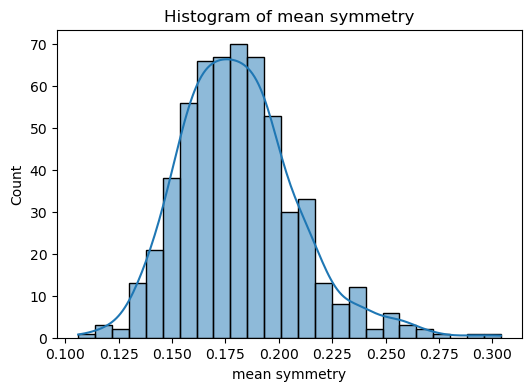

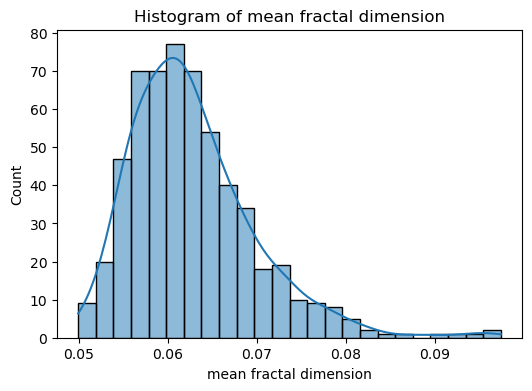

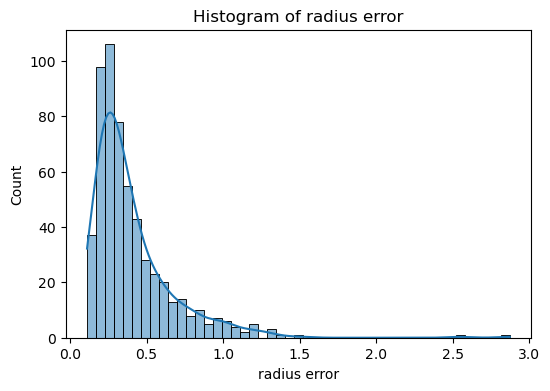

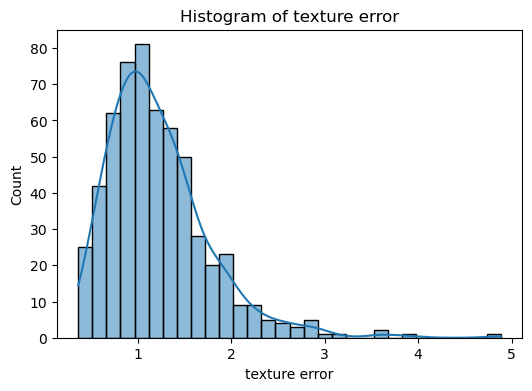

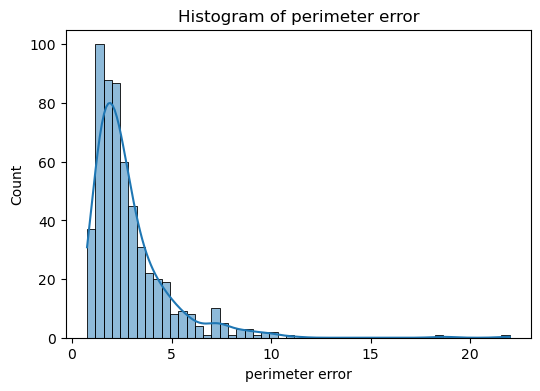

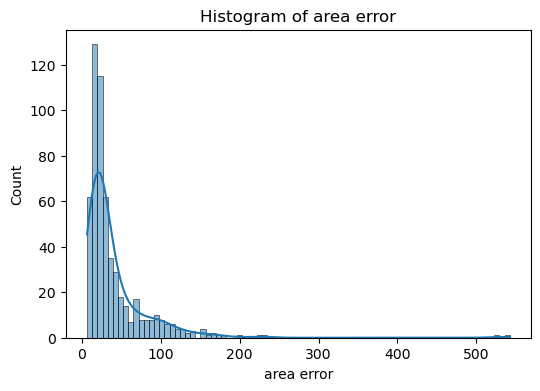

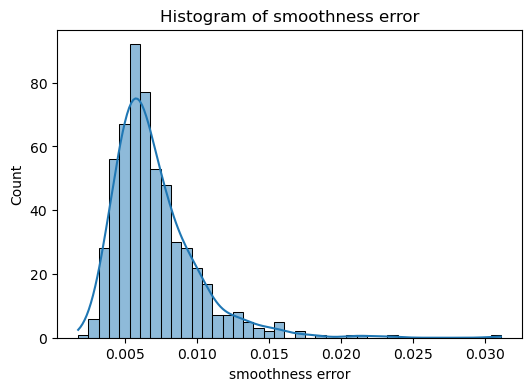

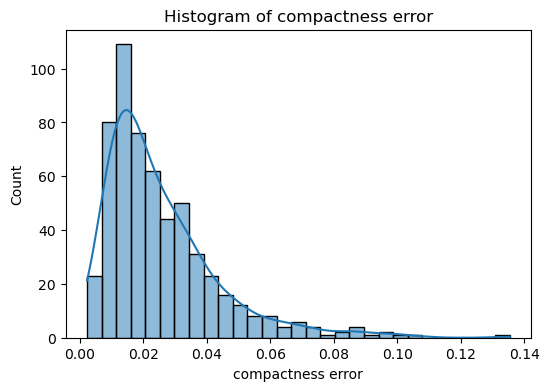

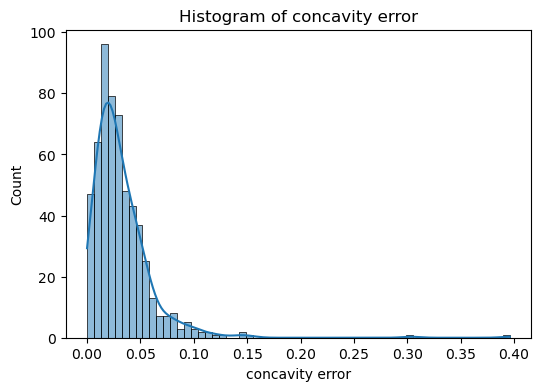

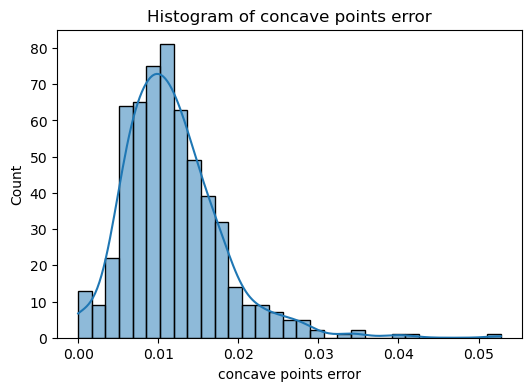

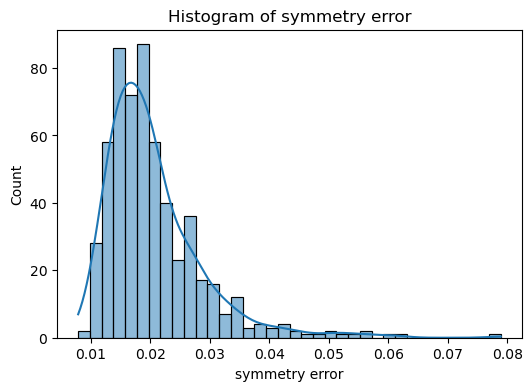

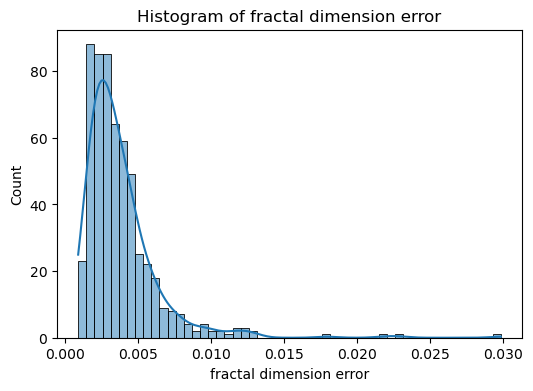

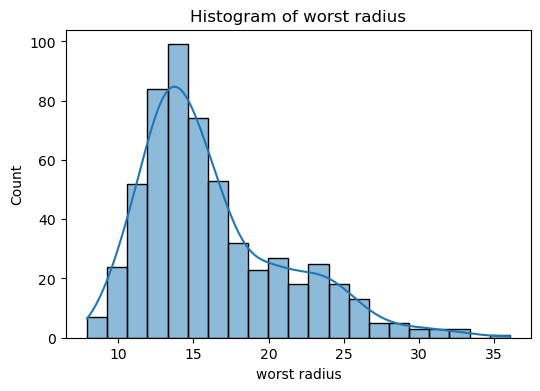

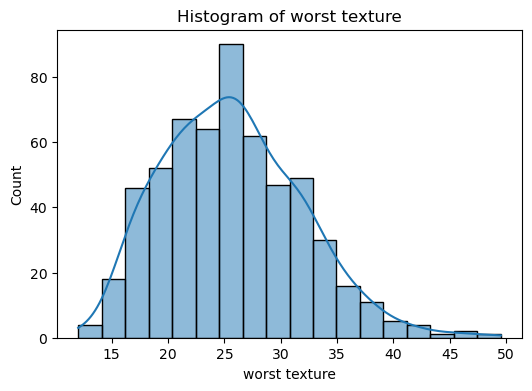

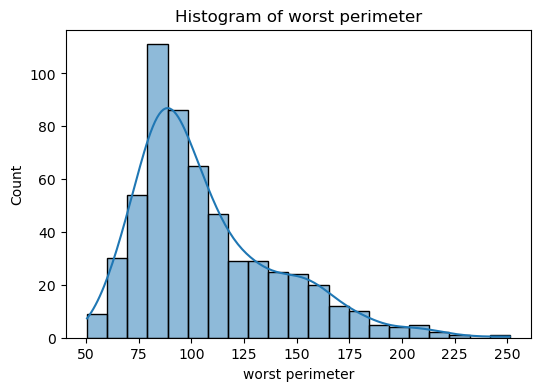

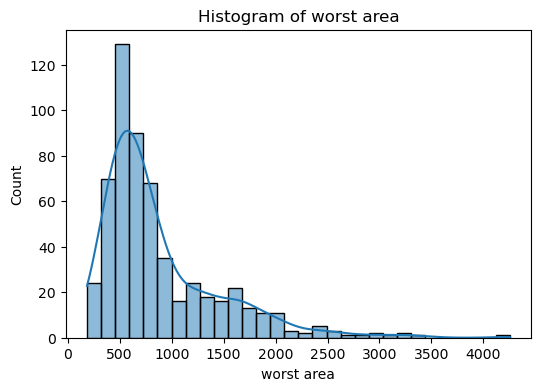

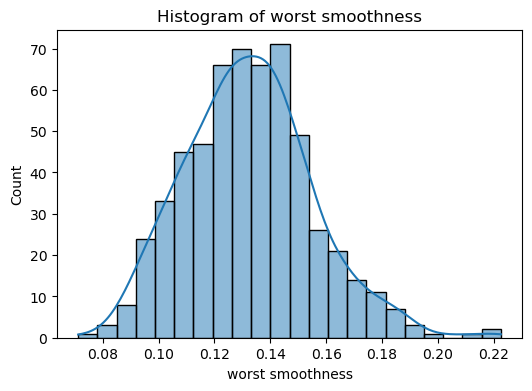

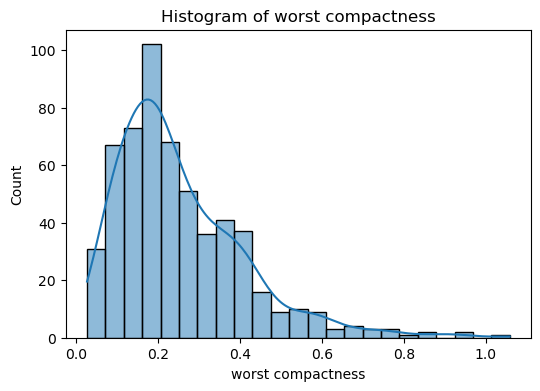

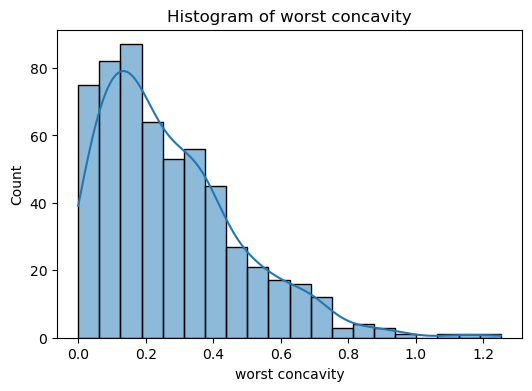

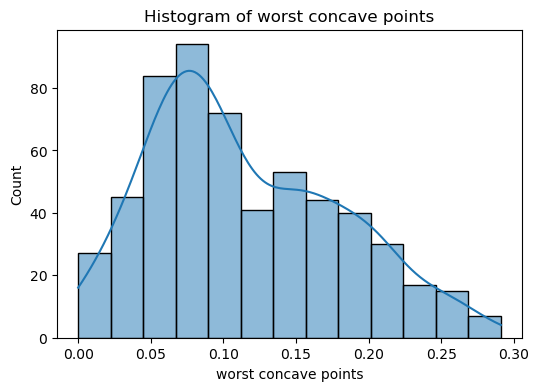

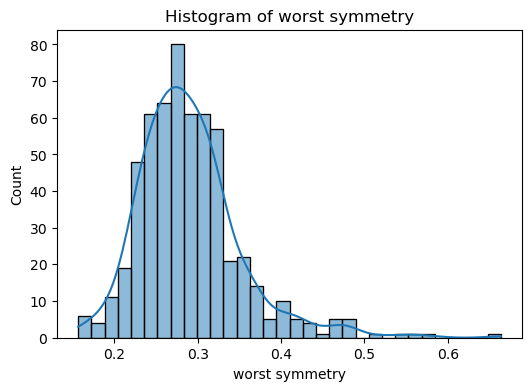

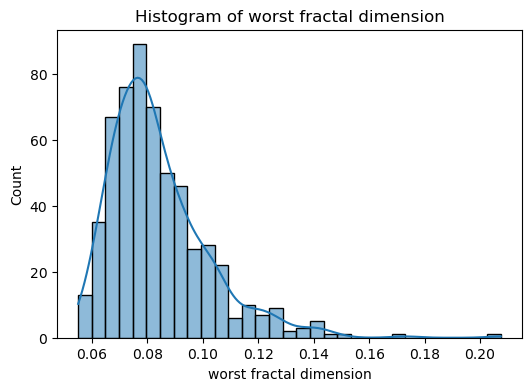

In [9]:
for i, feature_name in enumerate(cancer_data.feature_names):
    plt.figure(figsize=(6,4))
    sns.histplot(X[:,i],kde=True)
    plt.xlabel(feature_name)
    plt.ylabel("Count")
    plt.title("Histogram of {}".format(feature_name))
    plt.savefig("a2.png")
    plt.show()

##### 绘制箱线图

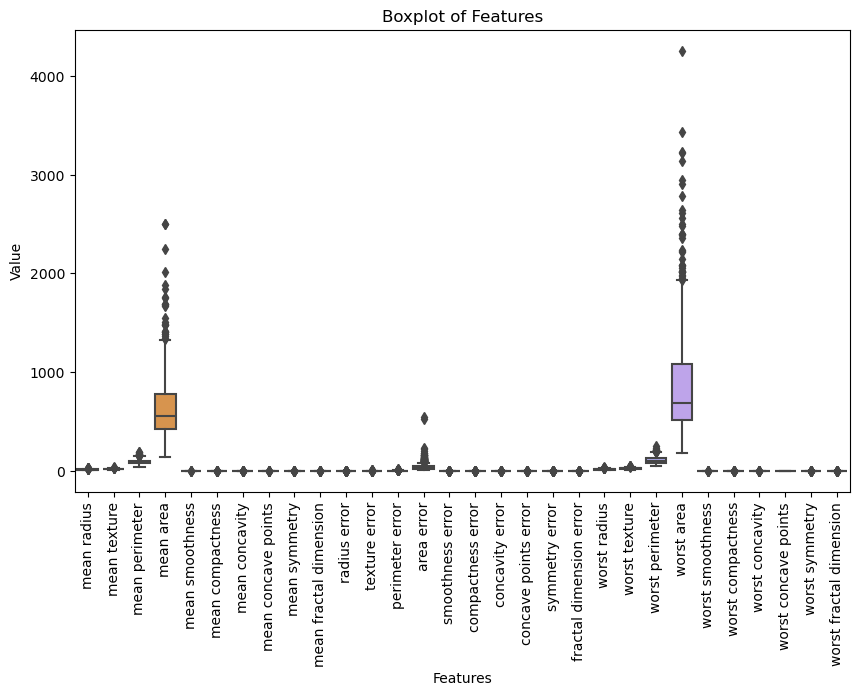

In [10]:
    plt.figure(figsize=(10,6))
    sns.boxplot(data=X,orient="v")
    plt.xticks(range(len(cancer_data.feature_names)),cancer_data.feature_names,rotation=90)
    plt.xlabel("Features")
    plt.ylabel("Value")
    plt.title("Boxplot of Features")
    plt.show()

#### 异常值处理

In [11]:
df = pd.DataFrame(cancer_data.data,columns=cancer_data.feature_names)
df = df.dropna()    #删除缺失值
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df)
selector = SelectKBest(score_func=f_classif,k=10)
seleted_features = selector.fit_transform(scaled_features,cancer_data.target)
print("预处理后的特征数据:")
print(seleted_features)

预处理后的特征数据:
[[ 1.09706398  1.26993369  0.9843749  ...  2.00123749  2.10952635
   2.29607613]
 [ 1.82982061  1.68595471  1.90870825 ...  1.89048899 -0.14674897
   1.0870843 ]
 [ 1.57988811  1.56650313  1.55888363 ...  1.45628455  0.85497394
   1.95500035]
 ...
 [ 0.70228425  0.67267578  0.57795264 ...  0.42790561  0.3267666
   0.41406869]
 [ 1.83834103  1.98252415  1.73521799 ...  1.65317077  3.19760468
   2.28998549]
 [-1.80840125 -1.81438851 -1.34778924 ... -1.07581292 -1.30583065
  -1.74506282]]


#### 数据集划分

In [12]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

#### 分类算法：朴素贝叶斯算法
##### 一. 知识准备：
1.定理：贝叶斯分类是一类分类算法的总称，这类算法均以贝叶斯定理为基础，故统称为贝叶斯分类。<br/>
这个定理解决了现实生活里经常遇到的问题：已知某条件概率，如何得到两个事件交换后的概率，也就是在已知P(A|B)的情况下如何求得$P(B|A)$。这里先解释什么是条件概率：<br/>
表示事件B已经发生的前提下，事件A发生的概率，叫做事件B发生下事件A的条件概率。其基本求解公式为：$P(A|B) = \frac{P(AB)}{P(B)}$ <br/>
下面不加证明地直接给出贝叶斯定理：$P(B|A) =\frac{P(AB)}{P(A)}$.<br/>

2.原理：朴素贝叶斯分类原理
朴素贝叶斯分类是一种十分简单的分类算法，叫它朴素贝叶斯分类是因为这种方法的思想真的很朴素，朴素贝叶斯的思想基础是这样的：对于给出的待分类项，求解在此项出现的条件下各个类别出现的概率，哪个最大，就认为此待分类项属于哪个类别。<br/>
朴素贝叶斯分类的正式定义如下：</br>
1、设$x=\{a1,a2,a3\cdots\}$为一个待分类项，而每个$a$为$x$的一个特征属性。</br>
2、有类别集合$C=\{y_1,y_2,y_3\cdots\}$。</br>
3、计算$$p(y_1|x),p(y_2|x),p(y_3|x)\cdots$$。</br>
4、如果$$p(y_k|x)=max\{p(y_1|x),p(y_2|x),p(y_3|x)\cdots\}$$，则$x \in y_k$。</br>
那么现在的关键就是如何计算第3步中的各个条件概率。我们可以这么做：</br>
1、找到一个已知分类的待分类项集合，这个集合叫做训练样本集。</br>
2、统计得到在各类别下各个特征属性的条件概率估计。即$$p(a_1|y_1),p(a_2|y_1),p(a_3|y_1)\cdots$$</br>
3、如果各个特征属性是条件独立的，则根据贝叶斯定理有如下推导：$$p(y_1|x)=\frac{p(x|y_i)p(y_i)}{p(x)}$$</br>
因为分母对于所有类别为常数，因为我们只要将分子最大化皆可。又因为各特征属性是条件独立的，所以有：$$p(x|y_i)p(y_i)=P(a_1|y_i)P(a_2|y_i)\cdots P(a_m|y_i)$$</br>

$d=\sqrt{(a_1-a_2)^2+(b_1-b_2)^2}$

3.朴素贝叶斯分类流程:
整个朴素贝叶斯分类分为三个阶段。</br>
第一阶段——准备工作阶段，这个阶段的任务是为朴素贝叶斯分类做必要的准备，主要工作是根据具体情况确定特征属性，并对每个特征属性进行适当划分，然后由人工对一部分待分类项进行分类，形成训练样本集合。这一阶段的输入是所有待分类数据，输出是特征属性和训练样本。这一阶段是整个朴素贝叶斯分类中唯一需要人工完成的阶段，其质量对整个过程将有重要影响，分类器的质量很大程度上由特征属性、特征属性划分及训练样本质量决定。</br>
第二阶段——分类器训练阶段，这个阶段的任务就是生成分类器，主要工作是计算每个类别在训练样本中的出现频率及每个特征属性划分对每个类别的条件概率估计，并将结果记录。其输入是特征属性和训练样本，输出是分类器。这一阶段是机械性阶段，根据前面讨论的公式可以由程序自动计算完成。</br>
第三阶段——应用阶段。这个阶段的任务是使用分类器对待分类项进行分类，其输入是分类器和待分类项，输出是待分类项与类别的映射关系。这一阶段也是机械性阶段，由程序完成。</br>

#### 对训练集进行拟合

In [13]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
clf=GaussianNB()
clf.fit(X_train,Y_train)

GaussianNB()

#### 交叉验证
第五次交叉验证分析已经可以很好地预测肿瘤的良恶性

In [14]:
# split features and label # label
# transform the class labels from their original string representation (M and B) into integers
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(Y)
# Normalize the  data (center around 0 and scale to remove the variance).
scaler =StandardScaler()
Xs = scaler.fit_transform(X)
classifier_score=clf.score(X_train,Y_train)* 100
print ('The classifier accuracy score is {:03.2f}% \n'.format(classifier_score))
for i in range(2,6):
   cv_error = np.average(cross_val_score(GaussianNB(), Xs, y, cv=i)) * 100
   print('The {}-fold cross-validation accuracy score for this classifier is {:.2f} % \n'.format(i, cv_error))

The classifier accuracy score is 93.63% 

The 2-fold cross-validation accuracy score for this classifier is 92.80 % 

The 3-fold cross-validation accuracy score for this classifier is 92.97 % 

The 4-fold cross-validation accuracy score for this classifier is 92.97 % 

The 5-fold cross-validation accuracy score for this classifier is 92.79 % 



#### 模型评估（ROC曲线）

##### 决策树

In [15]:
from sklearn.metrics import accuracy_score,classification_report
from sklearn.metrics import confusion_matrix # 生产混淆矩阵
from sklearn import tree
clf_d = tree.DecisionTreeClassifier(criterion = 'entropy')
clf_d.fit(X_train,Y_train)

DecisionTreeClassifier(criterion='entropy')

##### KNN

In [16]:
from sklearn.neighbors import (NeighborhoodComponentsAnalysis,
KNeighborsClassifier)
knn = KNeighborsClassifier(n_neighbors=3)
knn = knn.fit(X_train,Y_train)

##### 绘制ROC曲线

In [18]:
from sklearn.metrics import roc_auc_score,roc_curve,auc
from sklearn import metrics
import joblib
from matplotlib.font_manager import FontProperties
font_set = FontProperties(fname=r"c:\windows\fonts\simsun.ttc", size=15)


def multi_models_roc(names,sampling_methods,colors,X_test,y_test,save=True,dpin=100):
    plt.figure(figsize=(14,14),dpi=dpin)
    for (name,method,colorname) in zip(names,sampling_methods,colors):
        y_test_preds=method.predict(X_test)
        y_test_predprob = method.predict_proba(X_test)[:,1]
        fpr,tpr,thresholds = roc_curve(y_test,y_test_predprob,pos_label=1)
        plt.plot(fpr,tpr,lw=5,label='{}(AUC={:.3f})'.format(name,auc(fpr,tpr)),color=colorname)
        plt.plot([0,1],[0,1],'--',lw=5,color='grey')
        plt.axis('square')
        plt.xlim([0,1])
        plt.ylim([0,1])
        plt.xlabel("False Positive Rate",fontsize=20)
        plt.ylabel("True Positive Rate",fontsize=20)
        plt.title(u'ROC Curve-2022217573柯梦然',fontproperties=font_set)
        plt.legend(loc='lower right',fontsize=20) 
    if save:
       plt.savefig('multi_models_roc.png')
    return plt
 

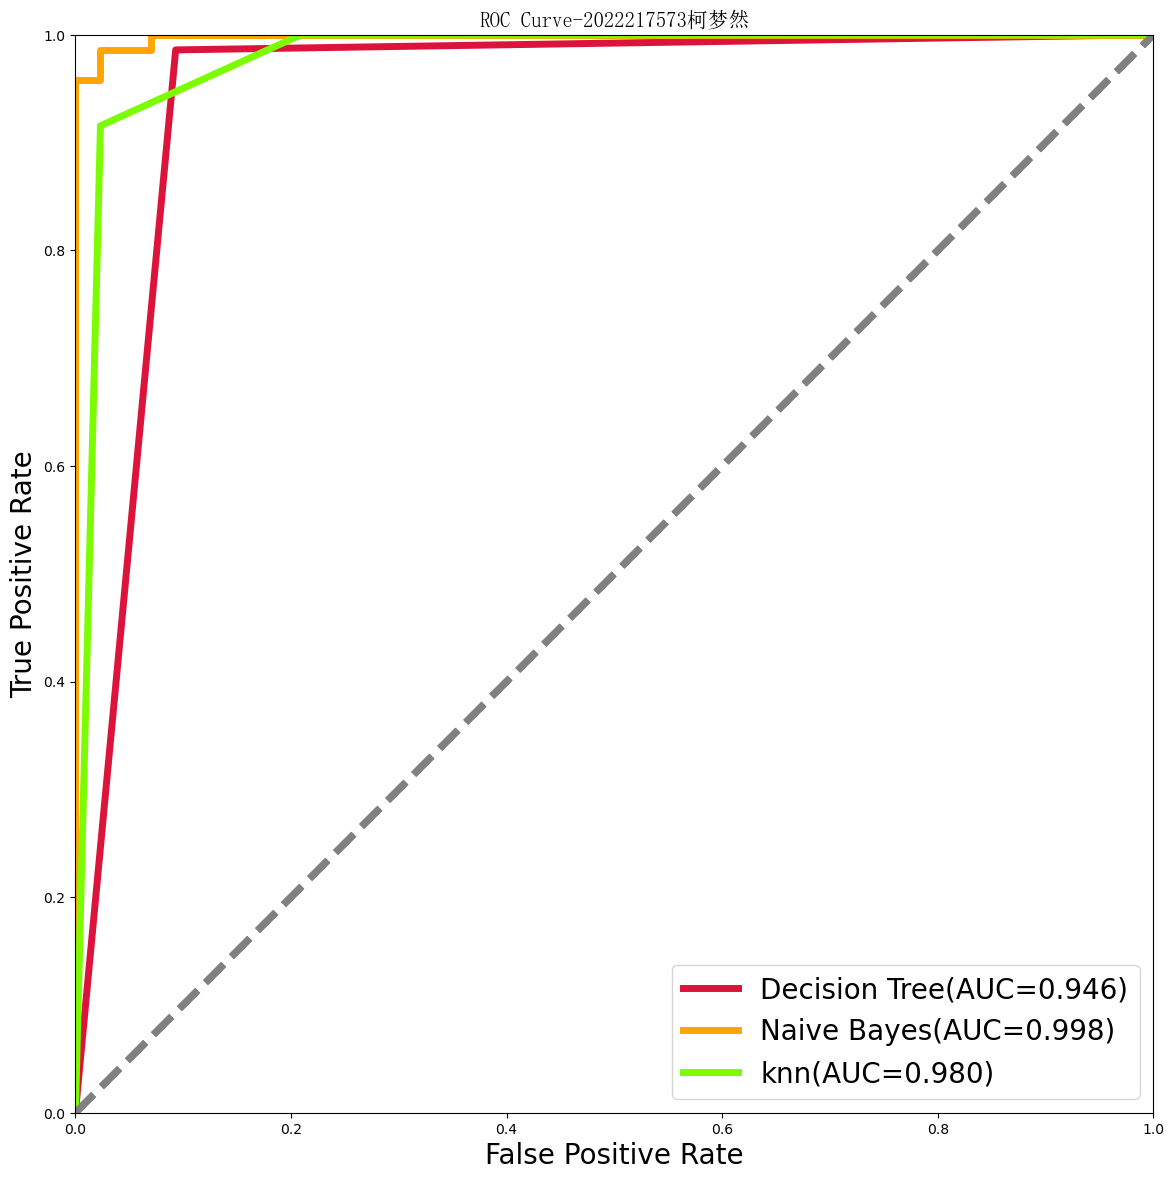

In [19]:
names = ['Decision Tree', # 这个就是模型标签，我们使用三个，所以需要三个标签
         'Naive Bayes',
         'knn']

sampling_methods = [clf_d, # 这个就是训练的模型。
                    clf,
                    knn
                   ]

colors = ['crimson',  # 这个是曲线的颜色，几个模型就需要几个颜色哦！
          'orange',
          'lawngreen'
         ]

#ROC curves
test_roc_graph = multi_models_roc(names, sampling_methods, colors, X_test, Y_test, save = True)  # 这里可以改成训练集
test_roc_graph.savefig('2ROC_Train_all.png')

#### 最终预测结果可视化

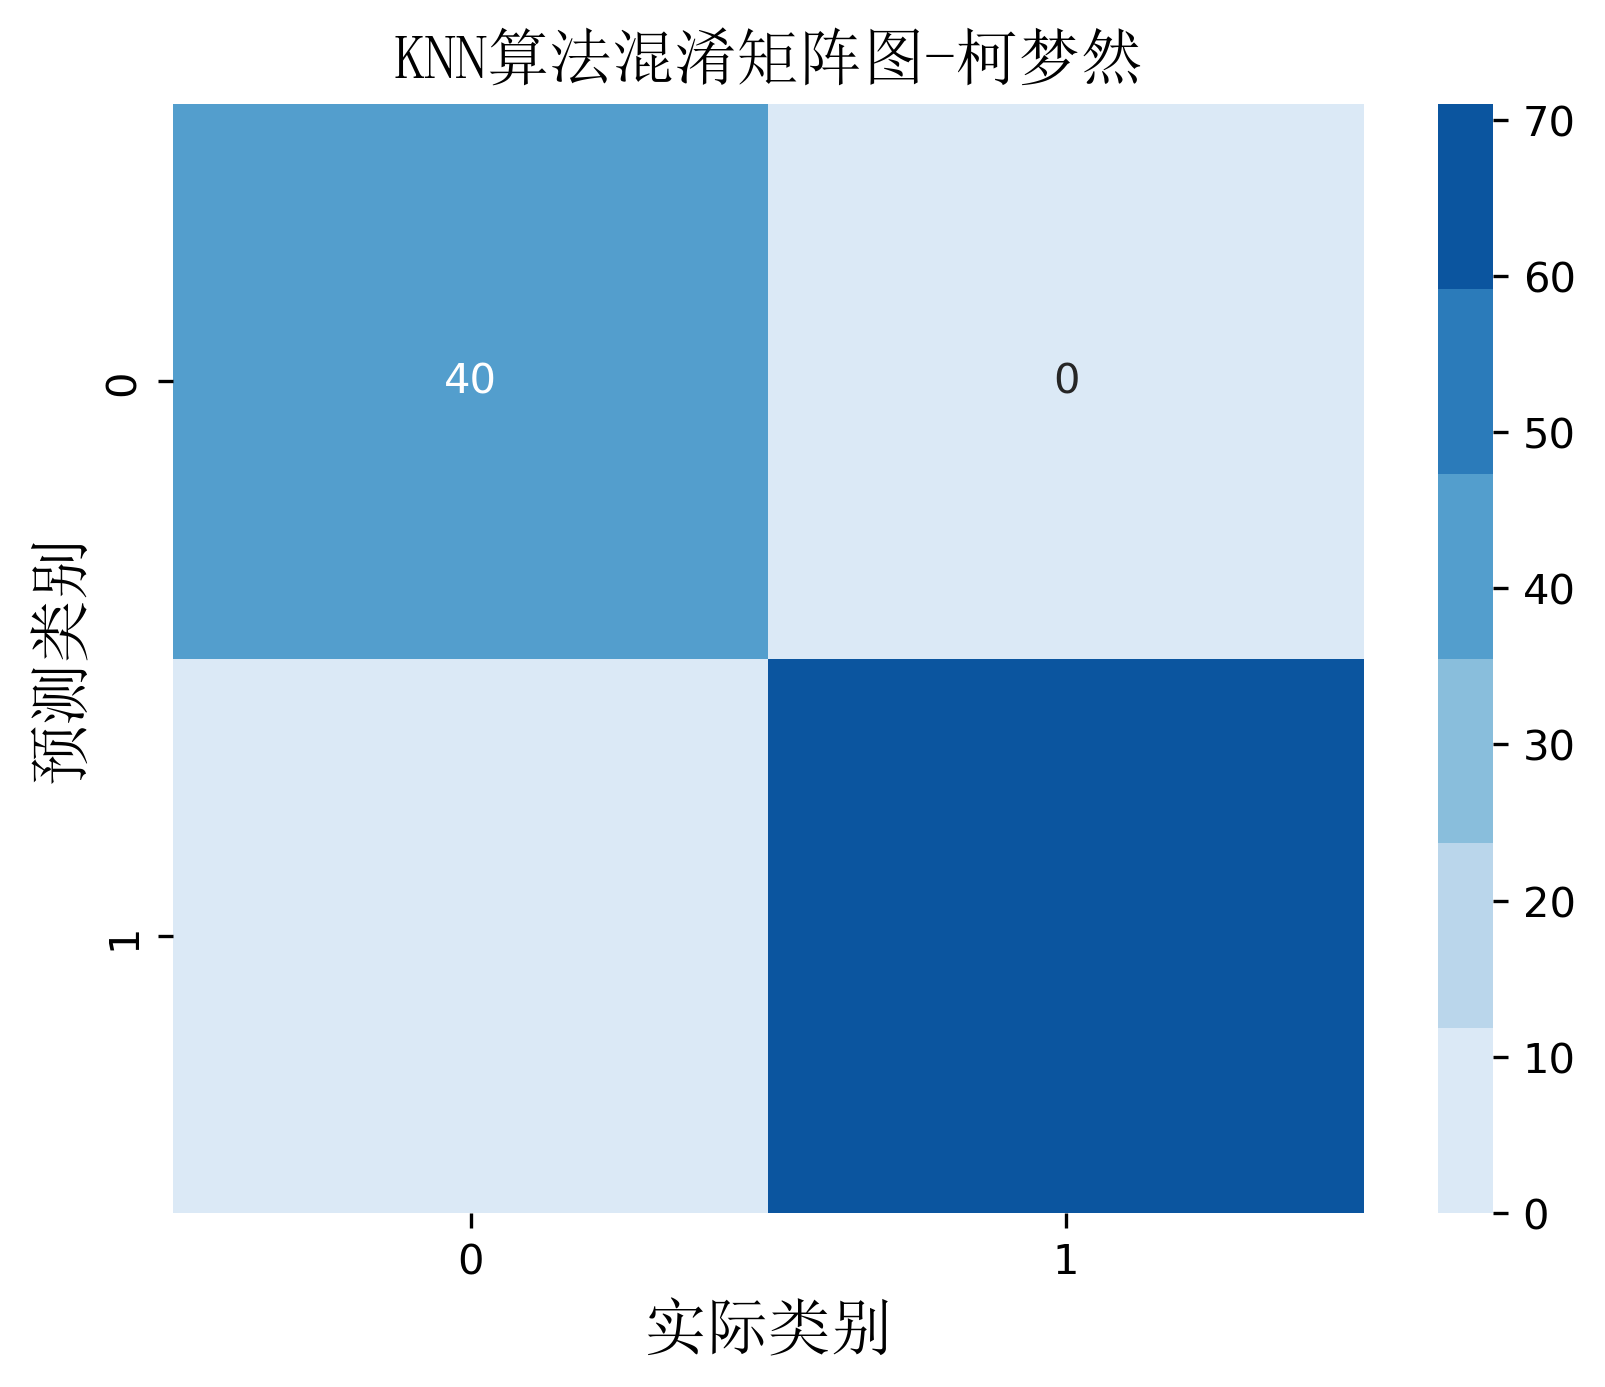

In [20]:
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot                   #解决xlabel,ylabel的中文乱码问题
from matplotlib.font_manager import FontProperties
font_set = FontProperties(fname=r"c:\windows\fonts\simsun.ttc", size=15)
y_pred=clf.predict(X_test)       
clf.score(X_test,Y_test)
pred=clf.predict(X_test)
cm=confusion_matrix(pred,Y_test)
plt.figure(dpi=300)
sns.heatmap(cm,cmap=sns.color_palette("Blues"),annot=True,fmt='d')
plt.xlabel(u'实际类别',fontproperties=font_set)
plt.ylabel(u'预测类别',fontproperties=font_set)
plt.savefig('matrix2.png')
plt.title(u"KNN算法混淆矩阵图-柯梦然",fontproperties=font_set)
plt.show()    

##### 不同模型间比较

In [21]:
def bxplots(results,names):
    fig = plt.figure()
    fig.suptitle(u'Algorithm Comparison-柯梦然',fontproperties=font_set)
    ax = fig.add_subplot(111)
    plt.boxplot(results)
    ax.set_xticklabels(names)
    plt.show()

def piplinecompare(models, X_train, y_train):
    results = []
    names = []
    for name, model in models:
        kfold = KFold( n_splits=10,shuffle=True,random_state=7)
        cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='roc_auc')
        results.append(cv_results)
        names.append(name)
        msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
        print(msg)
    return results,names

LR: 0.987360 (0.012909)
LDA: 0.994718 (0.008501)
KNN: 0.955163 (0.045085)
CART: 0.925901 (0.052855)
NB: 0.984713 (0.008208)
SVM: 0.968368 (0.029399)


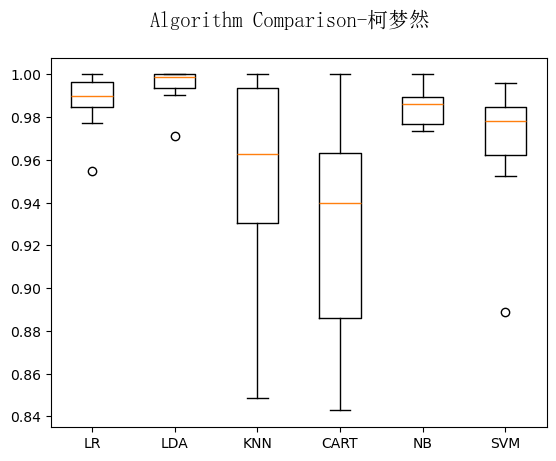

ScaledLR: 0.996582 (0.004565)
ScaledLDA: 0.994718 (0.008501)
ScaledKNN: 0.988712 (0.015141)
ScaledCART: 0.915411 (0.054539)
ScaledNB: 0.987099 (0.008194)
ScaledSVM: 0.996251 (0.005490)


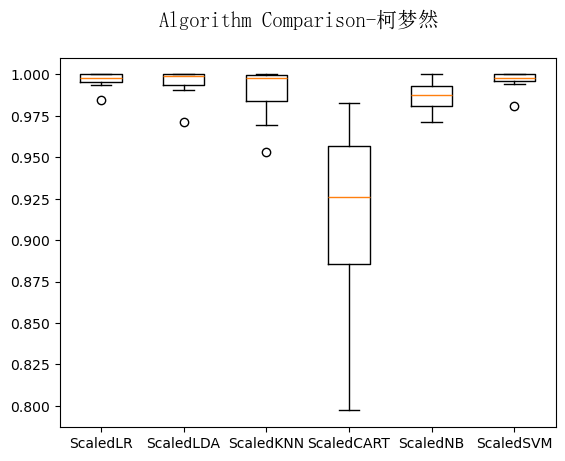

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import KFold

models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA',LinearDiscriminantAnalysis()))
models.append(('KNN',KNeighborsClassifier()))
models.append(('CART',DecisionTreeClassifier()))
models.append(('NB',GaussianNB()))
models.append(('SVM',SVC()))

# Standardize the dataset
pipelines = []
pipelines.append(( 'ScaledLR' , Pipeline([( 'Scaler' , StandardScaler()),( 'LR' ,
    LogisticRegression())])))
pipelines.append(( 'ScaledLDA' , Pipeline([( 'Scaler' , StandardScaler()),( 'LDA' ,
    LinearDiscriminantAnalysis())])))
pipelines.append(( 'ScaledKNN' , Pipeline([( 'Scaler' , StandardScaler()),( 'KNN' ,
    KNeighborsClassifier())])))
pipelines.append(( 'ScaledCART' , Pipeline([( 'Scaler' , StandardScaler()),( 'CART' ,
    DecisionTreeClassifier())])))
pipelines.append(( 'ScaledNB' , Pipeline([( 'Scaler' , StandardScaler()),( 'NB' ,
    GaussianNB())])))
pipelines.append(( 'ScaledSVM' , Pipeline([( 'Scaler' , StandardScaler()),( 'SVM' , SVC())])))


results,names = piplinecompare(models, X_train, Y_train)
bxplots(results,names)

results1,names1 = piplinecompare(pipelines, X_train, Y_train)
bxplots(results1,names1)